# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [ ]:
## Download and upzip data set, only need to be done once

# download 
# curl -O https://d17h27t6h515a5.cloudfront.net/topher/2017/February/5898cd6f_traffic-signs-data/traffic-signs-data.zip

# unzip
# upzip traffic-signs-data.zip


In [111]:
## Import relavent libariries

import pickle
import numpy as np
import pandas as pd
import cv2
import tensorflow as tf
import time
import matplotlib.pyplot as plt
from tensorflow.contrib.layers import flatten
from sklearn.utils import shuffle
%matplotlib inline

In [77]:
## Load pickled data, read training, validating and testing data

training_file = 'traffic-signs-data/train.p'
validation_file = 'traffic-signs-data/valid.p'
testing_file = 'traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

# Read signData
sign_file = 'traffic-signs-data/signnames.csv'

with open(sign_file, mode = 'r') as f:
    signData = pd.read_csv(f)

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

### 1. 1 Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [78]:
## Examine basics of data set

# Number of training examples
n_train = X_train.shape[0]

# Number of validation examples
n_validation = X_valid.shape[0]

# Number of testing examples.
n_test = X_test.shape[0]

# Shape of an traffic sign image
image_shape = X_train.shape[1:3]

# Number unique classes/labels there are in the dataset.
n_classes = signData.shape[0]

# number for class, counts for training data'
trainClass, trainIdx, trainCounts = np.unique(y_train, return_index = True, return_counts = True)
valiClass, valiCounts = np.unique(y_valid, return_counts = True)
testClass, testCounts = np.unique(y_test, return_counts = True)

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes in sign system =", n_classes)
print("Number of classes in training data =", trainClass.shape[0])
print("Number of classes in validating data =", valiClass.shape[0])
print("Number of classes in testing data =", testClass.shape[0])


Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32)
Number of classes in sign system = 43
Number of classes in training data = 43
Number of classes in validating data = 43
Number of classes in testing data = 43


### 1. 2 Include an exploratory visualization of the dataset
Visualize the German Traffic Signs Dataset using the pickled file(s).

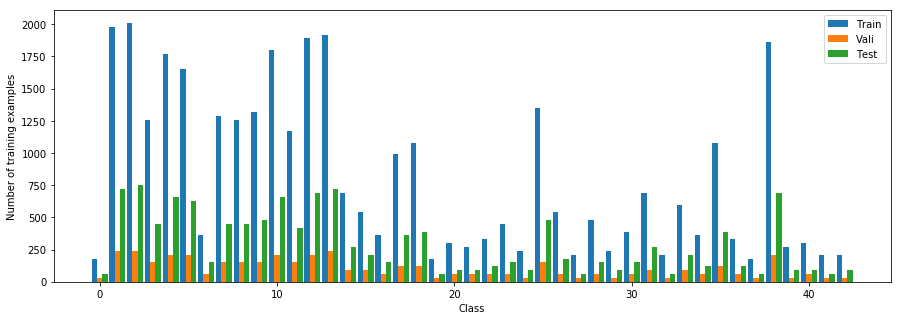

In [79]:
## Plot the distributions of classes in each data set

ax = plt.figure(figsize=(15,5))
barW = 0.3
plt.bar(trainClass - barW, trainCounts, width = barW, align = 'center')
plt.bar(valiClass, valiCounts, width = barW, align = 'center')
plt.bar(testClass + barW, testCounts, width = barW, align = 'center')
plt.xlabel('Class')
plt.ylabel('Number of training examples')
plt.legend(['Train','Vali','Test'])
plt.show()

Class =  0 , Speed limit (20km/h) , 180  examples


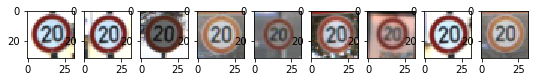

Class =  1 , Speed limit (30km/h) , 1980  examples


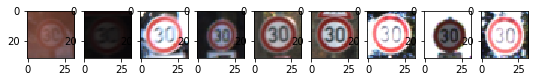

Class =  2 , Speed limit (50km/h) , 2010  examples


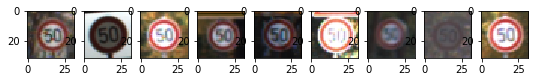

Class =  3 , Speed limit (60km/h) , 1260  examples


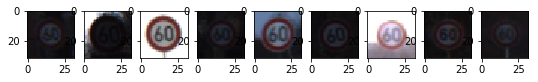

Class =  4 , Speed limit (70km/h) , 1770  examples


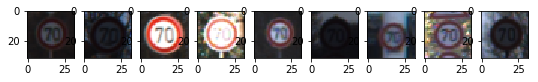

Class =  5 , Speed limit (80km/h) , 1650  examples


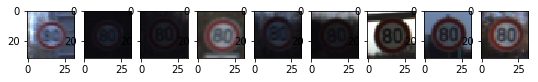

Class =  6 , End of speed limit (80km/h) , 360  examples


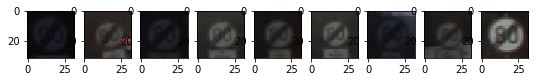

Class =  7 , Speed limit (100km/h) , 1290  examples


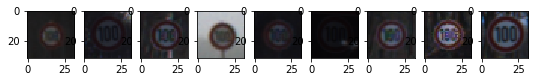

Class =  8 , Speed limit (120km/h) , 1260  examples


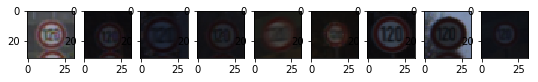

Class =  9 , No passing , 1320  examples


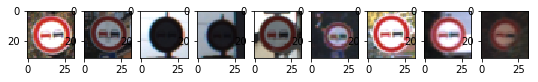

Class =  10 , No passing for vehicles over 3.5 metric tons , 1800  examples


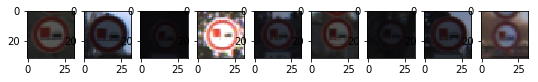

Class =  11 , Right-of-way at the next intersection , 1170  examples


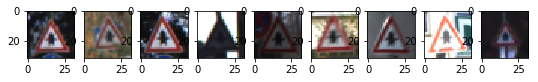

Class =  12 , Priority road , 1890  examples


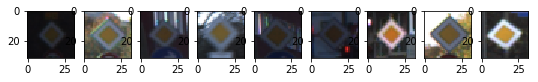

Class =  13 , Yield , 1920  examples


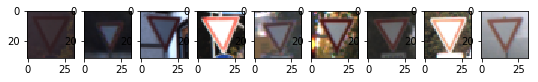

Class =  14 , Stop , 690  examples


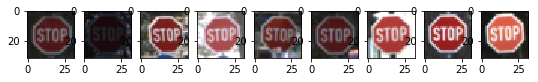

Class =  15 , No vehicles , 540  examples


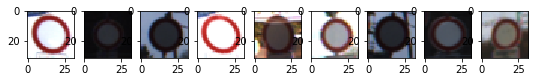

Class =  16 , Vehicles over 3.5 metric tons prohibited , 360  examples


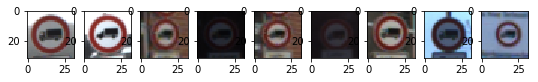

Class =  17 , No entry , 990  examples


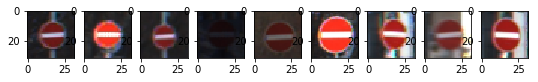

Class =  18 , General caution , 1080  examples


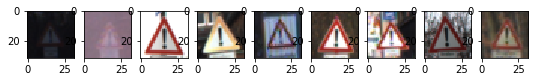

Class =  19 , Dangerous curve to the left , 180  examples


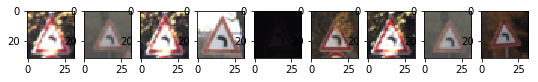

Class =  20 , Dangerous curve to the right , 300  examples


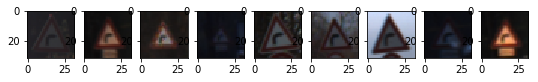

Class =  21 , Double curve , 270  examples


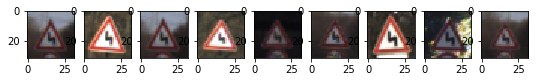

Class =  22 , Bumpy road , 330  examples


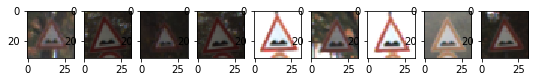

Class =  23 , Slippery road , 450  examples


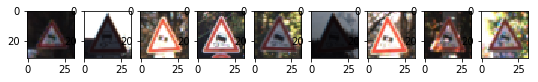

Class =  24 , Road narrows on the right , 240  examples


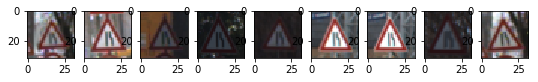

Class =  25 , Road work , 1350  examples


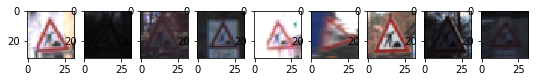

Class =  26 , Traffic signals , 540  examples


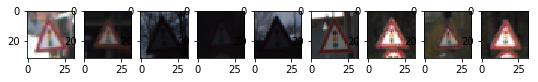

Class =  27 , Pedestrians , 210  examples


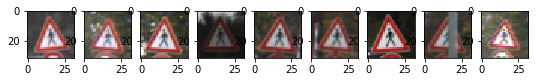

Class =  28 , Children crossing , 480  examples


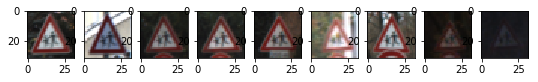

Class =  29 , Bicycles crossing , 240  examples


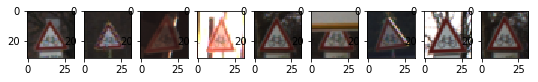

Class =  30 , Beware of ice/snow , 390  examples


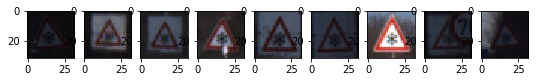

Class =  31 , Wild animals crossing , 690  examples


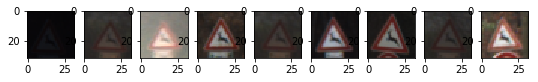

Class =  32 , End of all speed and passing limits , 210  examples


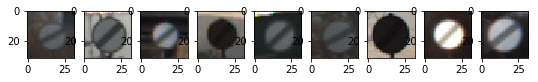

Class =  33 , Turn right ahead , 599  examples


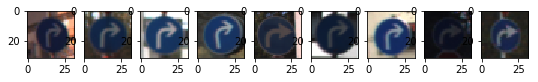

Class =  34 , Turn left ahead , 360  examples


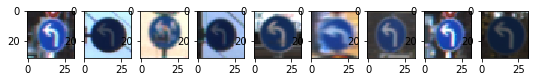

Class =  35 , Ahead only , 1080  examples


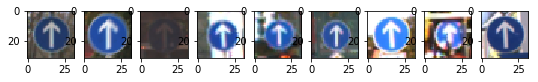

Class =  36 , Go straight or right , 330  examples


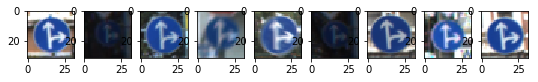

Class =  37 , Go straight or left , 180  examples


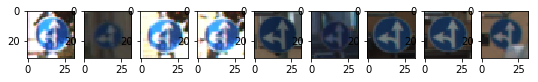

Class =  38 , Keep right , 1860  examples


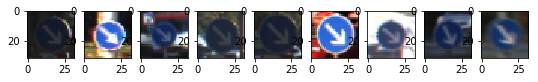

Class =  39 , Keep left , 270  examples


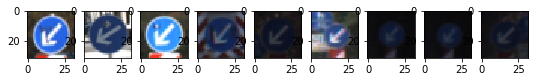

Class =  40 , Roundabout mandatory , 300  examples


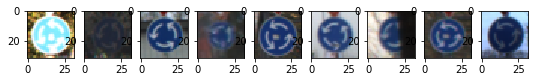

Class =  41 , End of no passing , 210  examples


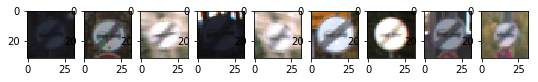

Class =  42 , End of no passing by vehicles over 3.5 metric tons , 210  examples


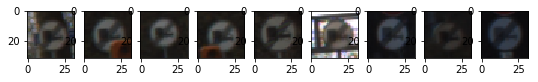

In [80]:
## Plot individual examples in each class in training data

nDemo = 10
for idxClass, count, idxStart in zip(trainClass,trainCounts,trainIdx):
# for i in range(0, trainClass.shape[0]):
    print('Class = ',idxClass,',',signData.SignName[idxClass], ',',count,' examples')
    fig = plt.figure(figsize=(nDemo,2))
    idxRnd = np.random.randint(idxStart, idxStart + count, nDemo)
    for j in range(1, nDemo):
        ax = fig.add_subplot(1, nDemo, j)
        ax.imshow(X_train[idxRnd[j]])
    plt.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. 

To meet specifications, the validation set accuracy will need to be at least 0.93.

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

References:
[LeCun](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf).

### 2. 1 Pre-process the Data Set
Pre-processing techniques used: Histogram equalization, grayscale, normalizatin

In [81]:
## Define parameters for pre-processing

opt = {'gamma': 2, 'gray': True}

In [82]:
## Define pipeline of pre-process data, decide which tools to be used

def preProcess(x, opt):
    n = x.shape[0]
    dim = list(x.shape)
    gamma = opt['gamma']
    if opt['gray'] == True:
        dim[3] = 1
    res = np.zeros(dim,dtype = np.float32)
    for i in range(0, n):
        xTemp = x[i]
#         xTemp = gamma_correction(xTemp,gamma)
        xTemp = hist_equalization(xTemp)
        if opt['gray'] == True:
            xTemp = rgb2gray(xTemp)
        xTemp = scaleDown(xTemp)
        if opt['gray'] == True:
            res[i] = xTemp[:,:,np.newaxis]
        else:
            res[i] = xTemp        
    return res

In [83]:
## Define each helper function might be used

def scaleDown(img):
    return np.float32(img/255)
#     return np.float32((img - 128)/128)

def scaleUp(img):
    return np.uint8(img*255)
#     return np.uint8(img*128 + 128)

def gamma_correction(img,gamma):
    img = img/255
    img = cv2.pow(img,1/gamma)
    return np.uint8(img*255)

def hist_equalization(img):
    # Method 1, hist equal in YUV space
    imgYUV = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
    # equalize the histogram of the Y channel
    imgYUV[:,:,0] = cv2.equalizeHist(imgYUV[:,:,0])
    # convert the YUV image back to RGB format
    imgOut = cv2.cvtColor(imgYUV, cv2.COLOR_YUV2RGB)
    # Method 2, hist equal all RGB channel    
#     imgOut = img.copy()
#     imgOut[:,:,0] = cv2.equalizeHist(img[:,:,0])
#     imgOut[:,:,1] = cv2.equalizeHist(img[:,:,1])
#     imgOut[:,:,2] = cv2.equalizeHist(img[:,:,2])
    return imgOut

def rgb2gray(img):
    return cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

def rgb2yuv(img):
    return cv2.cvtColor(img,cv2.COLOR_RGB2YUV)


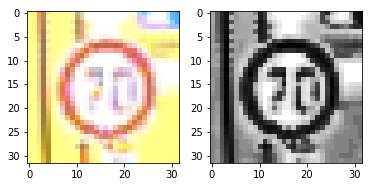

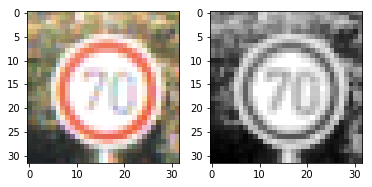

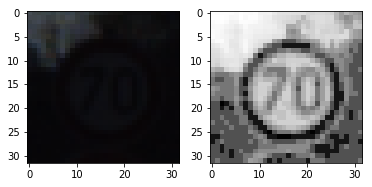

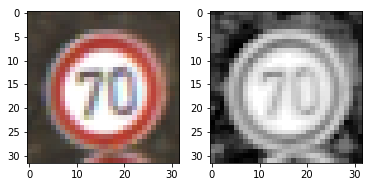

In [84]:
## Testing helper functions with selected examples

idxTest = [7774,7991,8109,8150]
# idxTest = [7774]
xIn = X_train[idxTest];
# xOut = gamma_correction(xIn,gamma)
# xOut = scaleDown(xOut)
xOut = preProcess(xIn, opt);
xOut = scaleUp(xOut);
# print(xIn.shape)
# print(xOut.shape)
for i in range(len(idxTest)):
#     print(xIn[i].shape)
#     print(xOut[i].shape)
    plt.figure; 
    plt.subplot(121); plt.imshow(xIn[i]);
    if opt['gray'] == True:
        plt.subplot(122); plt.imshow(xOut[i].squeeze(), cmap = 'gray');
    else:
        plt.subplot(122); plt.imshow(xOut[i]);
    plt.show()


In [85]:
## Pre-process traing, validating and testing data set

X_train_pre = preProcess(X_train, opt)
X_valid_pre = preProcess(X_valid, opt)
X_test_pre = preProcess(X_test, opt)

X_train_pre.astype(np.float32);
X_valid_pre.astype(np.float32);
X_test_pre.astype(np.float32);

# print(X_train_pre.dtype)
# print(X_valid_pre.dtype)
# print(X_test_pre.dtype)

array([[[[ 0.8509804 ],
         [ 0.74117649],
         [ 0.80000001],
         ..., 
         [ 0.35686275],
         [ 0.36862746],
         [ 0.32549021]],

        [[ 0.89803922],
         [ 0.8509804 ],
         [ 0.88235295],
         ..., 
         [ 0.9137255 ],
         [ 0.89019608],
         [ 0.80000001]],

        [[ 0.88627452],
         [ 0.90196079],
         [ 0.8509804 ],
         ..., 
         [ 0.93333334],
         [ 0.93725491],
         [ 0.92941177]],

        ..., 
        [[ 0.67843139],
         [ 0.50588238],
         [ 0.55686277],
         ..., 
         [ 0.67450982],
         [ 0.6156863 ],
         [ 0.80000001]],

        [[ 0.61960787],
         [ 0.54901963],
         [ 0.45490196],
         ..., 
         [ 0.54901963],
         [ 0.61960787],
         [ 0.74509805]],

        [[ 0.54901963],
         [ 0.50196081],
         [ 0.55686277],
         ..., 
         [ 0.67843139],
         [ 0.67843139],
         [ 0.79607844]]],


       [[[ 0.17647

Class =  0 , Speed limit (20km/h) , 180  examples


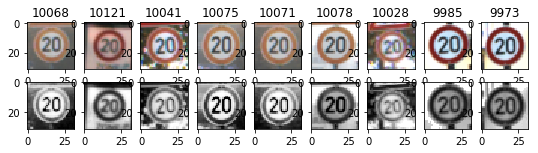

Class =  1 , Speed limit (30km/h) , 1980  examples


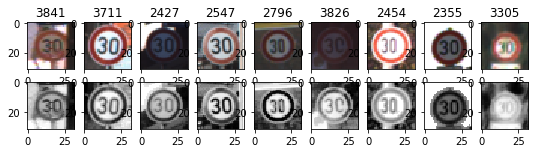

Class =  2 , Speed limit (50km/h) , 2010  examples


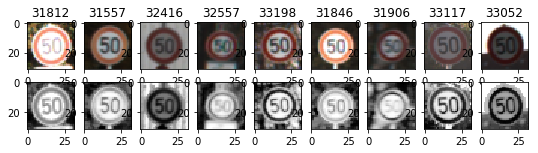

Class =  3 , Speed limit (60km/h) , 1260  examples


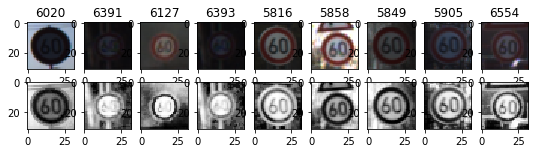

Class =  4 , Speed limit (70km/h) , 1770  examples


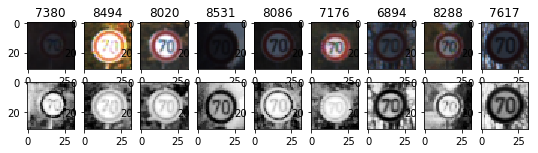

Class =  5 , Speed limit (80km/h) , 1650  examples


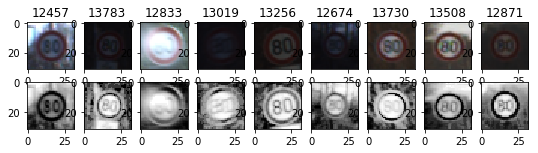

Class =  6 , End of speed limit (80km/h) , 360  examples


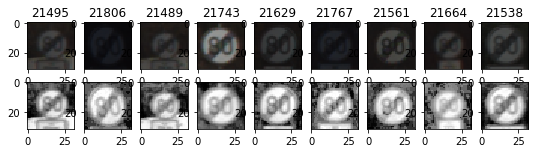

Class =  7 , Speed limit (100km/h) , 1290  examples


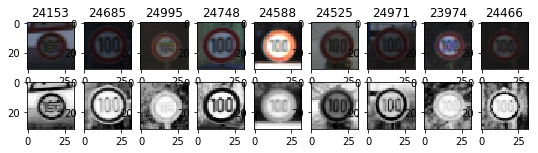

Class =  8 , Speed limit (120km/h) , 1260  examples


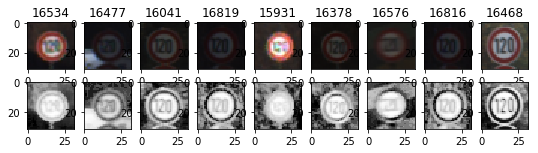

Class =  9 , No passing , 1320  examples


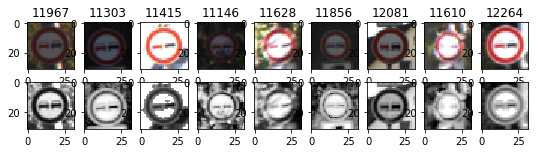

Class =  10 , No passing for vehicles over 3.5 metric tons , 1800  examples


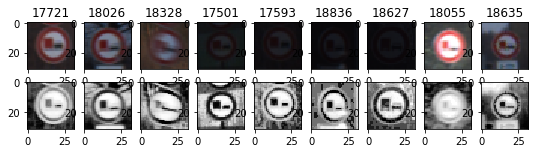

Class =  11 , Right-of-way at the next intersection , 1170  examples


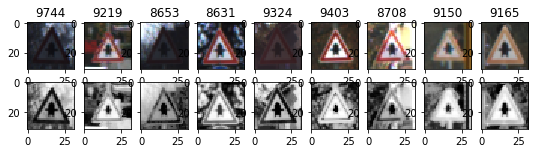

Class =  12 , Priority road , 1890  examples


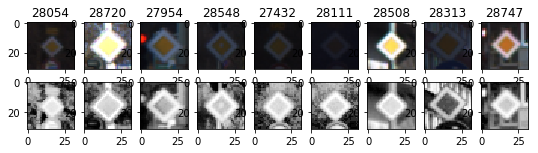

Class =  13 , Yield , 1920  examples


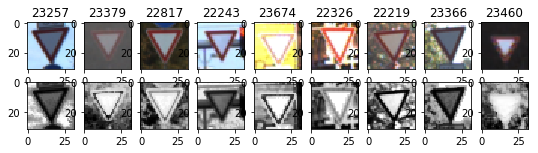

Class =  14 , Stop , 690  examples


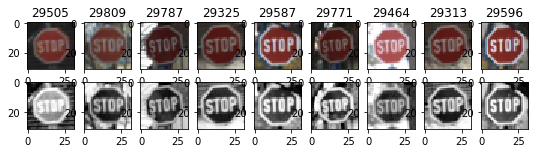

Class =  15 , No vehicles , 540  examples


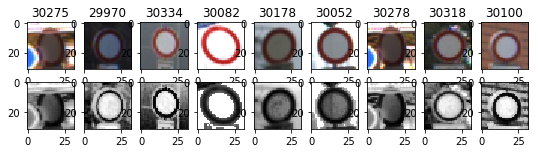

Class =  16 , Vehicles over 3.5 metric tons prohibited , 360  examples


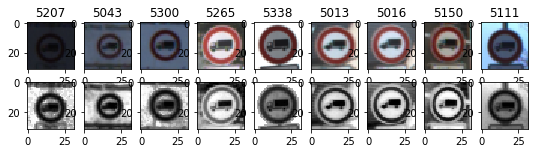

Class =  17 , No entry , 990  examples


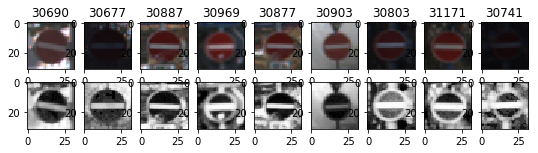

Class =  18 , General caution , 1080  examples


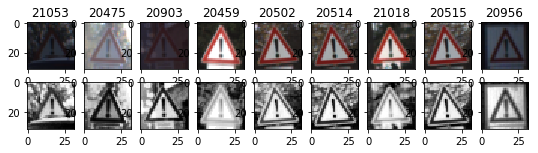

Class =  19 , Dangerous curve to the left , 180  examples


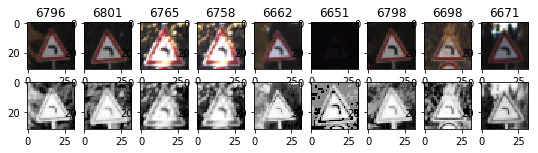

Class =  20 , Dangerous curve to the right , 300  examples


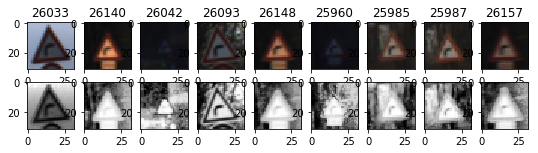

Class =  21 , Double curve , 270  examples


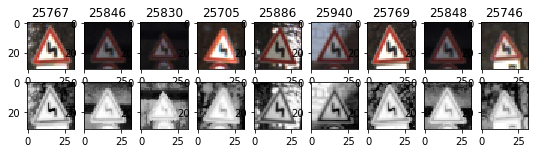

Class =  22 , Bumpy road , 330  examples


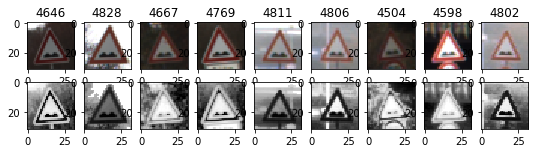

Class =  23 , Slippery road , 450  examples


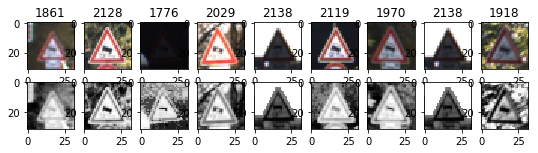

Class =  24 , Road narrows on the right , 240  examples


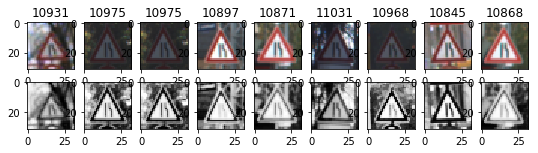

Class =  25 , Road work , 1350  examples


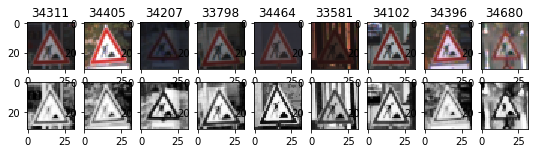

Class =  26 , Traffic signals , 540  examples


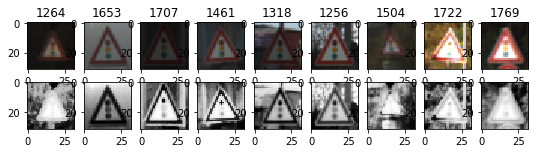

Class =  27 , Pedestrians , 210  examples


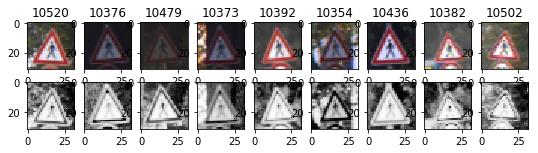

Class =  28 , Children crossing , 480  examples


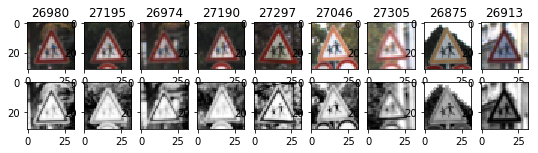

Class =  29 , Bicycles crossing , 240  examples


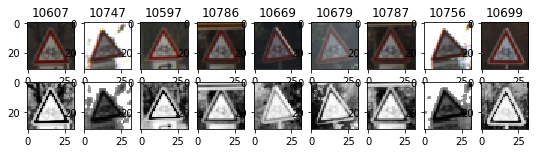

Class =  30 , Beware of ice/snow , 390  examples


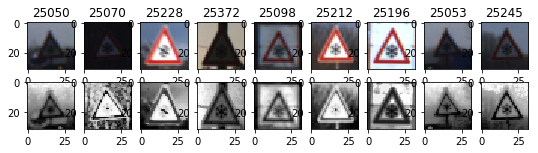

Class =  31 , Wild animals crossing , 690  examples


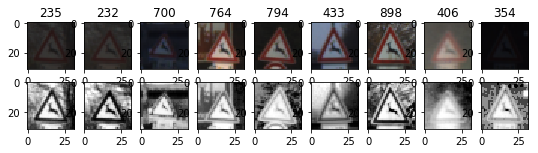

Class =  32 , End of all speed and passing limits , 210  examples


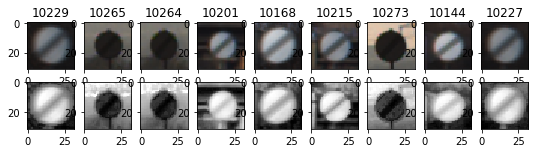

Class =  33 , Turn right ahead , 599  examples


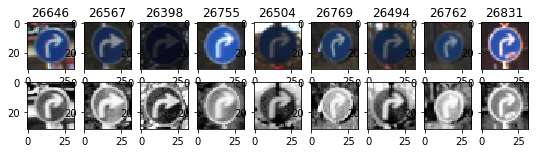

Class =  34 , Turn left ahead , 360  examples


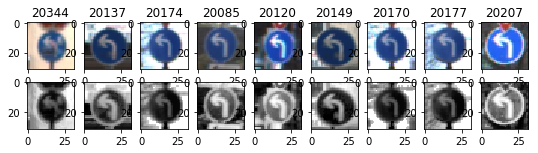

Class =  35 , Ahead only , 1080  examples


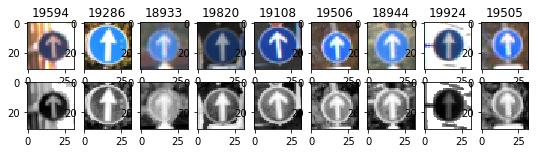

Class =  36 , Go straight or right , 330  examples


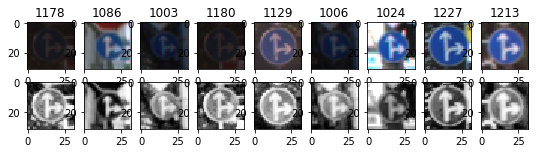

Class =  37 , Go straight or left , 180  examples


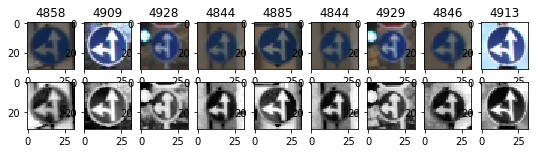

Class =  38 , Keep right , 1860  examples


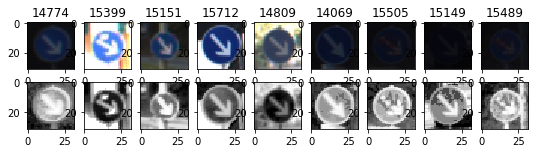

Class =  39 , Keep left , 270  examples


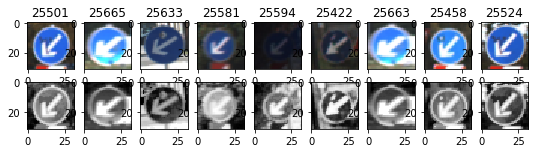

Class =  40 , Roundabout mandatory , 300  examples


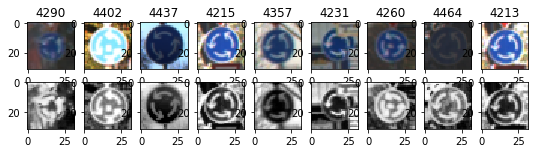

Class =  41 , End of no passing , 210  examples


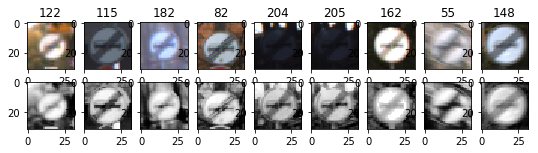

Class =  42 , End of no passing by vehicles over 3.5 metric tons , 210  examples


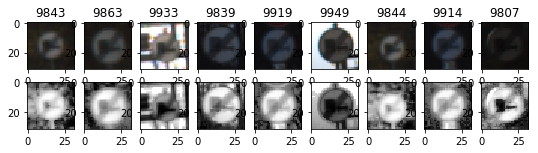

In [86]:
## Examine the pre-processed data

nDemo = 10
for idxClass, count, idxStart in zip(trainClass,trainCounts,trainIdx):
    print('Class = ',idxClass,',',signData.SignName[idxClass], ',',count,' examples')
    fig = plt.figure(figsize=(nDemo,2))
    idxRnd = np.random.randint(idxStart, idxStart + count, nDemo)
    for j in range(1, nDemo):
        ax = fig.add_subplot(2, nDemo, j)
        ax.title.set_text(str(idxRnd[j]))  
        ax.imshow(X_train[idxRnd[j]])
        ax = fig.add_subplot(2, nDemo, j + nDemo)
        if opt['gray'] == True:
            ax.imshow(X_train_pre[idxRnd[j]].squeeze(), cmap = 'gray')
        else:
            ax.imshow(X_train_pre[idxRnd[j]])
    plt.show()

### 2. 2 Model Architecture

In [87]:
## Define model parameters

optCNN = {'initMu': 0, 'initStd': 0.1}

In [88]:
## Define each individual layer

def convLayer(x, fSize, stride, inDepth, outDepth, optCNN):
    conW = tf.Variable(tf.truncated_normal(shape = (fSize, fSize, inDepth, outDepth), 
                                            mean = optCNN['initMu'], stddev = optCNN['initStd']))
    conB = tf.Variable(tf.zeros(outDepth))
    con = tf.nn.conv2d(x, conW, strides = [stride, stride, stride, stride],
                      padding = 'VALID') + conB
    con = tf.nn.relu(con)
    return con

def maxPool(x, fSize):
    return tf.nn.max_pool(x, ksize = [1, fSize, fSize, 1], strides = [1, fSize, fSize, 1],
                         padding = 'VALID')

def fullCon(x, inDim, outDim, optCNN):
    W = tf.Variable(tf.truncated_normal(shape = (inDim, outDim), mean = optCNN['initMu'], 
                                       stddev = optCNN['initStd']))
    B = tf.Variable(tf.zeros(outDim))
    y = tf.matmul(x, W) + B
    y = tf.nn.relu(y)
    return y

In [105]:
## Construct full model

# trial 1: 10, 20, 50, 800, 200, 78%
# tiral 2: 20, 40, 80, 1280, 200, 82.7%
# tiral 3: 40, 80, 120, 1920, 300, %

def fullModel(x, optCNN):
    # input dimension = [32, 32, 1]
    
    # output dimension = [28, 28, 100]
    convL1 = convLayer(x, 5, 1, 1, 40, optCNN)
    
    # output dimension = [14, 14, 100]
    maxPool1 = maxPool(convL1, 2)
    
    # output dimension = [10, 10, 150]
    convL2 = convLayer(maxPool1, 5, 1, 40, 80, optCNN)
    
    # output dimension = [5, 5, 150]
    maxPool2 = maxPool(convL2, 2)
    
    # output dimension = [4, 4, 200]
    convL3 = convLayer(maxPool2, 2, 1, 80, 120, optCNN)
    
    # output dimension = 800
    fCon1 = flatten(convL3)
    fCon1 = tf.nn.dropout(fCon1, keep_prob)
    
    # output dimension = 200
    fCon2 = fullCon(fCon1, 1920, 300, optCNN)
        
    # output dimension = 43
    logits = fullCon(fCon2, 300, 43, optCNN)
    
    return logits

### 2.4 Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [106]:
## Define training parameters

EPOCHS = 5
BATCH_SIZE = 128
rate = 0.0005 # learning rate
keepRate = 0.5 # drop rate = 1 - keep rate

In [107]:
## Set up tensor flow training session

# Set up place holder for input data
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.uint8, (None))
one_hot_y = tf.one_hot(y, n_classes)
keep_prob = tf.placeholder(tf.float32)

# logits = LeNet(x)
logits = fullModel(x, optCNN)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)

optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [108]:
## Set up tensor flow session to evaluate accuracy and loss
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data, keepRate):
    num_examples = len(X_data)
    total_accuracy = 0
    total_loss = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        [accuracy, loss] = sess.run([accuracy_operation, loss_operation], feed_dict={x: batch_x, y: batch_y, keep_prob: keepRate})
        total_accuracy += (accuracy * len(batch_x))
        total_loss += (loss * len(batch_x))
    return (total_accuracy / num_examples, total_loss / num_examples)

In [124]:
i = 1
tStart = time.time()


tElapsed = time.time() - tStart
# print('%.2f' % tElapsed)
print("EPOCH %.0f, time used = %.1f sec" % (i+1, tElapsed))


EPOCH 2, time used = 0.0 sec


In [109]:
## Train model and compute training and cross-validation error

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = n_train
    
    train_loss_history = np.empty([0], dtype = np.float32)
    train_accuracy_history = np.empty([0], dtype = np.float32)
    valid_loss_history = np.empty([0], dtype = np.float32)
    valid_accuracy_history = np.empty([0], dtype = np.float32)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        timeStart = time.time()
        X_train_rand, y_train_rand = shuffle(X_train_pre, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train_rand[offset:end], y_train_rand[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: keepRate})
        
        [train_accuracy, train_loss] = evaluate(X_train_pre, y_train, keepRate)
        [valid_accuracy, valid_loss] = evaluate(X_valid_pre, y_valid, 1)
        
        valid_loss_history = np.append(valid_loss_history, [valid_loss])
        valid_accuracy_history = np.append(valid_accuracy_history, [valid_accuracy])
        train_loss_history = np.append(train_loss_history, [train_loss])
        train_accuracy_history = np.append(train_accuracy_history, [train_accuracy])
        
        timeElapsed = time.time() - timeStart
        print("EPOCH %.0f, time used = %.1f sec" % (i+1, timeElapsed))
        print("Training accuracy = %.1f%%, training loss = %.3f" % (100*train_accuracy, train_loss))
        print("Validation accuracy = %.1f%%, validation loss = %.3f" % (100*valid_accuracy, valid_loss))
        print()
        
    saver.save(sess, './TrafficSignModel')
    print("Model saved")

Training...

EPOCH 1 ...
Training accuracy = 73.0%, training loss = 1.085
Validation accuracy = 74.6%, validation loss = 1.082

EPOCH 2 ...
Training accuracy = 80.7%, training loss = 0.762
Validation accuracy = 78.9%, validation loss = 0.843

EPOCH 3 ...
Training accuracy = 83.6%, training loss = 0.638
Validation accuracy = 80.9%, validation loss = 0.763

EPOCH 4 ...
Training accuracy = 85.4%, training loss = 0.573
Validation accuracy = 80.8%, validation loss = 0.744

EPOCH 5 ...
Training accuracy = 86.1%, training loss = 0.549
Validation accuracy = 82.1%, validation loss = 0.710

Model saved


In [ ]:
## Monitoring training and validation accuracy

# def plotAccuracy(train_acc, train_loss, valid_acc, valid_loss):
#     plt.fig
#     ax = fig.

In [94]:
# Test the trained model
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    [test_accuracy, test_loss] = evaluate(X_test_pre, y_test, 1)
    print("Testing accuracy = %.1f%%, testing loss = %.3f" % (100*test_accuracy, test_loss))


Testing accuracy = 78.5%, testing loss = 0.892


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [95]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.


### Predict the Sign Type for Each Image

In [96]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.


### Analyze Performance

In [97]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [98]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [99]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")